示例为高斯核SVM的调参过程

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [3]:
# 构造数据
from sklearn.preprocessing import StandardScaler
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)
X = StandardScaler().fit_transform(X)

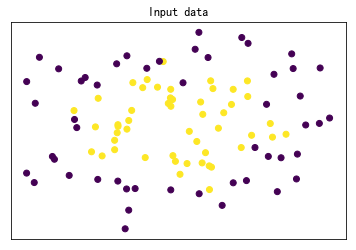

In [9]:
# 可视化数据
ax = plt.subplot()
ax.scatter(X[:,0], X[:, 1], c=y)
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("Input data")
plt.show()

In [13]:
# svm分类器超参数选取
param_grid = {"C":[0.1, 1, 10], "gamma":[1, 0.1, 0.01]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=4)
grid.fit(X, y)
print("The best parameters are %s with a score of %0.3f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'gamma': 0.1} with a score of 0.910


In [16]:
# 可视化计算结果
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

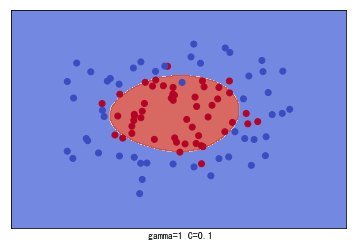

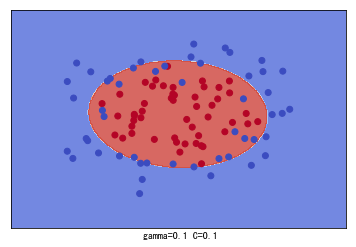

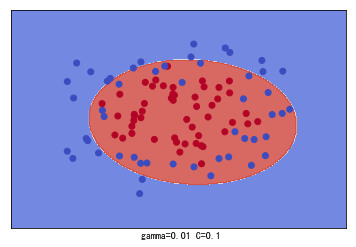

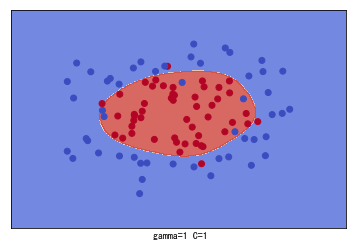

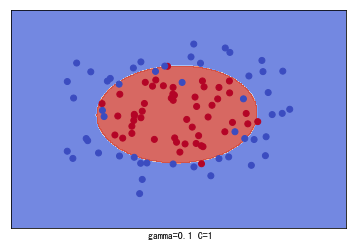

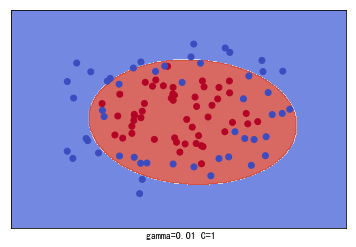

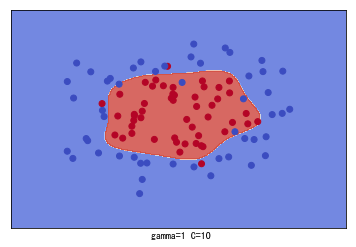

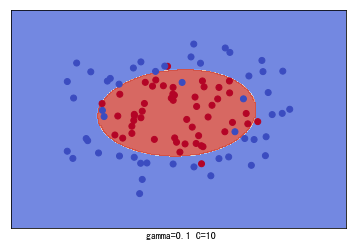

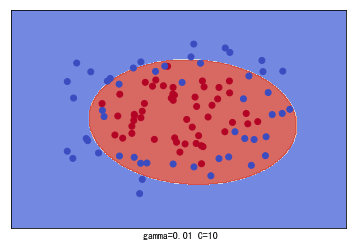

In [18]:
for i, C in enumerate((0.1, 1, 10)):     
    for j, gamma in enumerate((1, 0.1, 0.01)):
        plt.subplot()
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X, y)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xticks(())
        plt.yticks(())
        plt.xlabel(" gamma=" + str(gamma) + " C=" + str(C))
        plt.show()